In [21]:
# Import common dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import streamlit as st
import plotly.graph_objects as go
import plotly.express as px
from bokeh.palettes import viridis
from math import *

In [2]:
# Get racquet specs dataframe
df = pd.read_csv('racquet_database.csv')

In [3]:
m1 = np.arange(0, 7.01, 0.01)
m2 = np.arange(0, 7.01, 0.01)

In [4]:
xv, yv = np.meshgrid(m1, m2)

In [5]:
w_tail = xv.reshape(-1, 1)
w_tip = yv.reshape(-1, 1)
w_pairs = np.concatenate((w_tail, w_tip), axis=1)

In [6]:
w_pairs

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [6.98, 7.  ],
       [6.99, 7.  ],
       [7.  , 7.  ]])

In [37]:
custom_df = pd.DataFrame(data=w_pairs, columns=['tail_weight', 'tip_weight'])

In [38]:
custom_df

,tail_weight,tip_weight
0,0.00,0.0
1,0.01,0.0
2,0.02,0.0
3,0.03,0.0
4,0.04,0.0
...,...,...
491396,6.96,7.0
491397,6.97,7.0
491398,6.98,7.0
491399,6.99,7.0


In [39]:
def delta_balance(M, L, b, m_tail, m_tip):
    delta_b = ((L-b)*(M*b/L + m_tip) - b*(M*(L-b)/L + m_tail))/(M + m_tail + m_tip)
    return b + delta_b

In [40]:
def delta_swingweight(L, m_tail, m_tip):
    return m_tail*(10**2) + m_tip*(L-10)**2

In [41]:
def delta_recoilweight(new_b, L, m_tail, m_tip):
    return m_tail * (new_b**2) + m_tip * (L - new_b)**2

In [42]:
custom_df['new_b'] = custom_df.apply(lambda row: delta_balance(349, 68.58, 31.8, row['tail_weight'], row['tip_weight']), axis=1) 

In [43]:
custom_df['delta_sw'] = custom_df.apply(lambda row: delta_swingweight(68.58, 0.001 * row['tail_weight'], 0.001 * row['tip_weight']), axis=1)

In [44]:
custom_df['delta_rw'] = custom_df.apply(lambda row: delta_recoilweight(row['new_b'], 68.58, 0.001 * row['tail_weight'], 0.001 * row['tip_weight']), axis=1)

In [49]:
custom_df[(custom_df['tail_weight'] == 6) & (custom_df['tip_weight'] == 6)]

,tail_weight,tip_weight,new_b,delta_sw,delta_rw
421200,6.0,6.0,31.88277,21.189698,14.179186


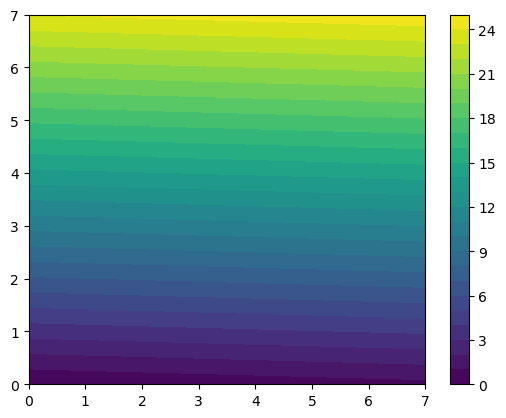

In [46]:
contourf(xv, yv, np.array(custom_df['delta_sw']).reshape(701, 701), levels=25)
colorbar()

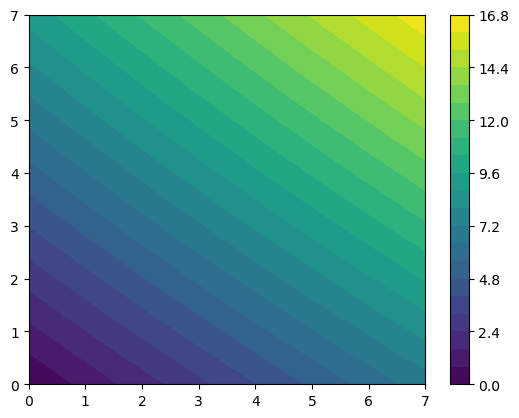

In [47]:
contourf(xv, yv, np.array(custom_df['delta_rw']).reshape(701, 701), levels=25)
colorbar()

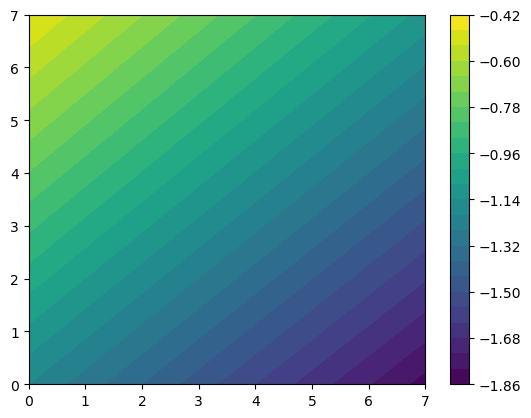

In [48]:
contourf(xv, yv, np.array(custom_df['new_b'] - 33).reshape(701, 701), levels=25)
colorbar()